In [4]:
# import statements

import pandas as pd
import matplotlib.pyplot as plt


In [5]:

# data_path = 
df = pd.read_stata('./NGPR7ADT/NGPR7AFL.DTA')

print(df.shape)
# print((df["hv105"] < 5).sum() )
# print(df["sbelig"])


(188010, 357)


Q1 How many children under the age of five were tested for malaria with a blood smear
test?

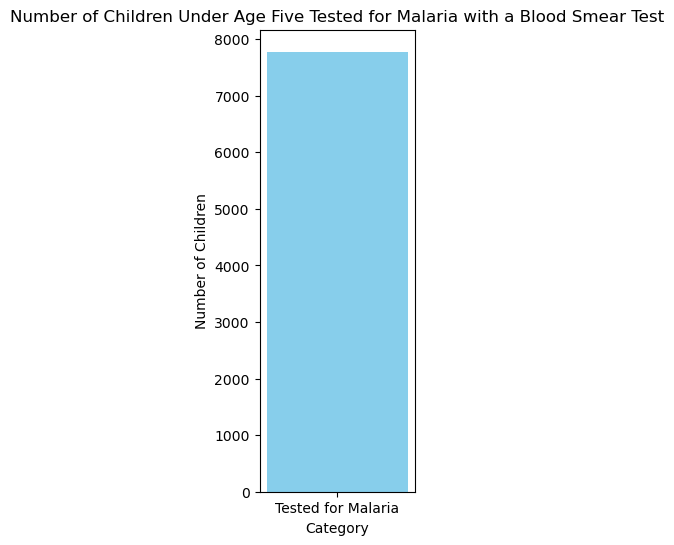

Number of children under age five tested for malaria with a blood smear test: 7778


In [6]:
children_under_five = df[(df['hv105'] < 5)]
children_tested_for_malaria = children_under_five[children_under_five['hml32'].notnull()]
num_children_tested_for_malaria = len(children_tested_for_malaria)

plt.figure(figsize=(2, 6))
plt.bar(['Tested for Malaria'], [num_children_tested_for_malaria], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Children')
plt.title('Number of Children Under Age Five Tested for Malaria with a Blood Smear Test')
plt.show()

print(f"Number of children under age five tested for malaria with a blood smear test: {num_children_tested_for_malaria}")


Q2 How many children under the age of five were tested for malaria with a rapid test?

In [7]:

age_column = 'hv105'
malaria_test_column = 'hml35'
df_cleaned = df.dropna(subset=[age_column, malaria_test_column])
children_under_five = df_cleaned[df_cleaned[age_column] < 5]
children_tested_for_malaria = children_under_five[children_under_five[malaria_test_column].notnull()]
num_children_tested_for_malaria = len(children_tested_for_malaria)
print(f"Number of children under the age of five tested for malaria with a rapid test: {num_children_tested_for_malaria}")


Number of children under the age of five tested for malaria with a rapid test: 10700


Q3 How many children tested positive for malaria with a microscopy?

Number of children under five who tested positive for malaria with microscopy: 0


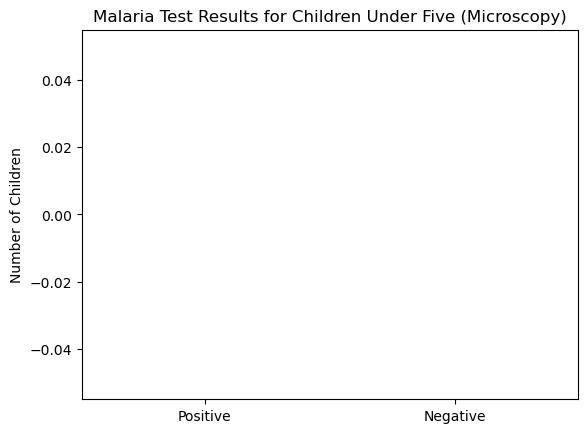

In [8]:
children_under_five = df[df['hv105'] < 5]

selected_for_microscopy = children_under_five[children_under_five['sbelig'] == 1]

positive_microscopy = selected_for_microscopy[selected_for_microscopy['hml32'] == 1].shape[0]

print(f"Number of children under five who tested positive for malaria with microscopy: {positive_microscopy}")


total_tested_microscopy = selected_for_microscopy.shape[0]

data = {
    'Positive': positive_microscopy,
    'Negative': total_tested_microscopy - positive_microscopy
}

fig, ax = plt.subplots()
ax.bar(data.keys(), data.values(), color=['green', 'red'])
ax.set_ylabel('Number of Children')
ax.set_title('Malaria Test Results for Children Under Five (Microscopy)')

plt.show()


Q4 How many children tested positive for malaria with a rapid test?

Number of children under five who tested positive for malaria with a rapid test: 0


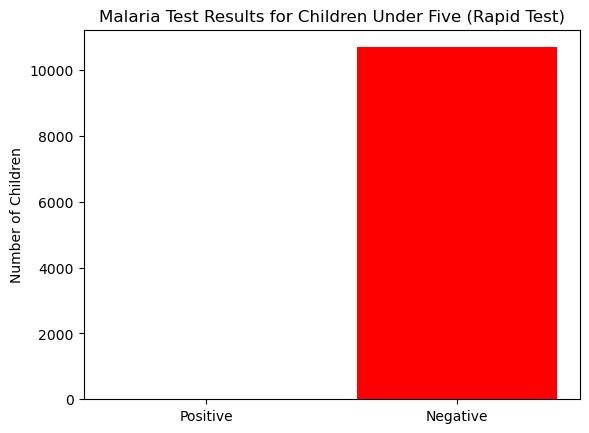

In [9]:
children_under_five = df[df['hv105'] < 5]

positive_rapid_test = children_under_five[children_under_five['hml35'] == 1].shape[0]

print(f"Number of children under five who tested positive for malaria with a rapid test: {positive_rapid_test}")
total_tested_rapid_test = children_under_five['hml35'].notnull().sum()

data = {
    'Positive': positive_rapid_test,
    'Negative': total_tested_rapid_test - positive_rapid_test
}

fig, ax = plt.subplots()
ax.bar(data.keys(), data.values(), color=['green', 'red'])
ax.set_ylabel('Number of Children')
ax.set_title('Malaria Test Results for Children Under Five (Rapid Test)')

# Display the plot
plt.show()


Q5 Make a plot showing the number of U5 children that tested positive for malaria by
microscopy and the number of U5 children that tested negative for malaria by
microscopy in urban and rural areas

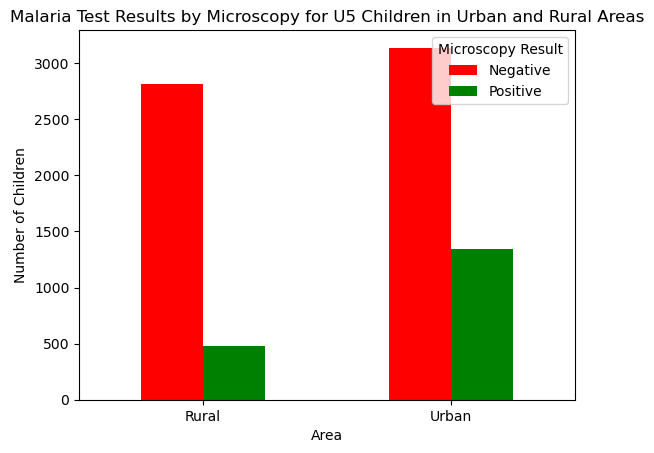

In [10]:
children_under_five = df[df['hv105'] < 5]

pivot_table = children_under_five.pivot_table(
    index='hv025', 
    columns='hml32', 
    aggfunc='size', 
    fill_value=0
)


pivot_table.columns = ['Negative', 'Positive']
pivot_table.index = ['Rural', 'Urban']

pivot_table.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Malaria Test Results by Microscopy for U5 Children in Urban and Rural Areas')
plt.xlabel('Area')
plt.ylabel('Number of Children')
plt.legend(title='Microscopy Result')
plt.xticks(rotation=0)

# Show the plot
plt.show()


Q6 Make another plot showing the proportion of U5 children that tested positive for
malaria by microscopy and the proportion of U5 children that tested negative for
malaria by microscopy in urban and rural areas

C:\Users\koner\AppData\Local\Temp\ipykernel_26664\2888322291.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_results_counts = children_under_five.groupby(['hv025', 'hml32']).size().unstack(fill_value=0)
C:\Users\koner\AppData\Local\Temp\ipykernel_26664\2888322291.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = children_under_five.groupby('hv025').size()


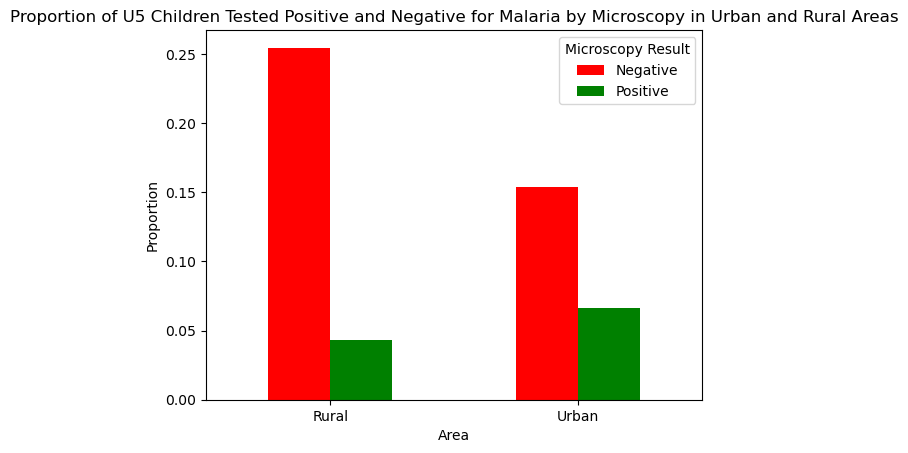

In [11]:
children_under_five = df[df['hv105'] < 5]

# Create a DataFrame for counts of test results by area
test_results_counts = children_under_five.groupby(['hv025', 'hml32']).size().unstack(fill_value=0)

# Calculate total number of children in each area
total_counts = children_under_five.groupby('hv025').size()

# Calculate proportions
proportions = test_results_counts.div(total_counts, axis=0)

# Rename index for clarity
proportions.index = ['Rural', 'Urban']

# Rename columns for clarity
proportions.columns = ['Negative', 'Positive']

# Plotting
proportions.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Proportion of U5 Children Tested Positive and Negative for Malaria by Microscopy in Urban and Rural Areas')
plt.xlabel('Area')
plt.ylabel('Proportion')
plt.legend(title='Microscopy Result')
plt.xticks(rotation=0)

# Show the plot
plt.show()


Q7 Make a map of the number of children that tested positive for malaria by state

C:\Users\koner\AppData\Local\Temp\ipykernel_26664\1853578290.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_counts_by_state = positive_cases.groupby('shstate').size().reset_index(name='count')


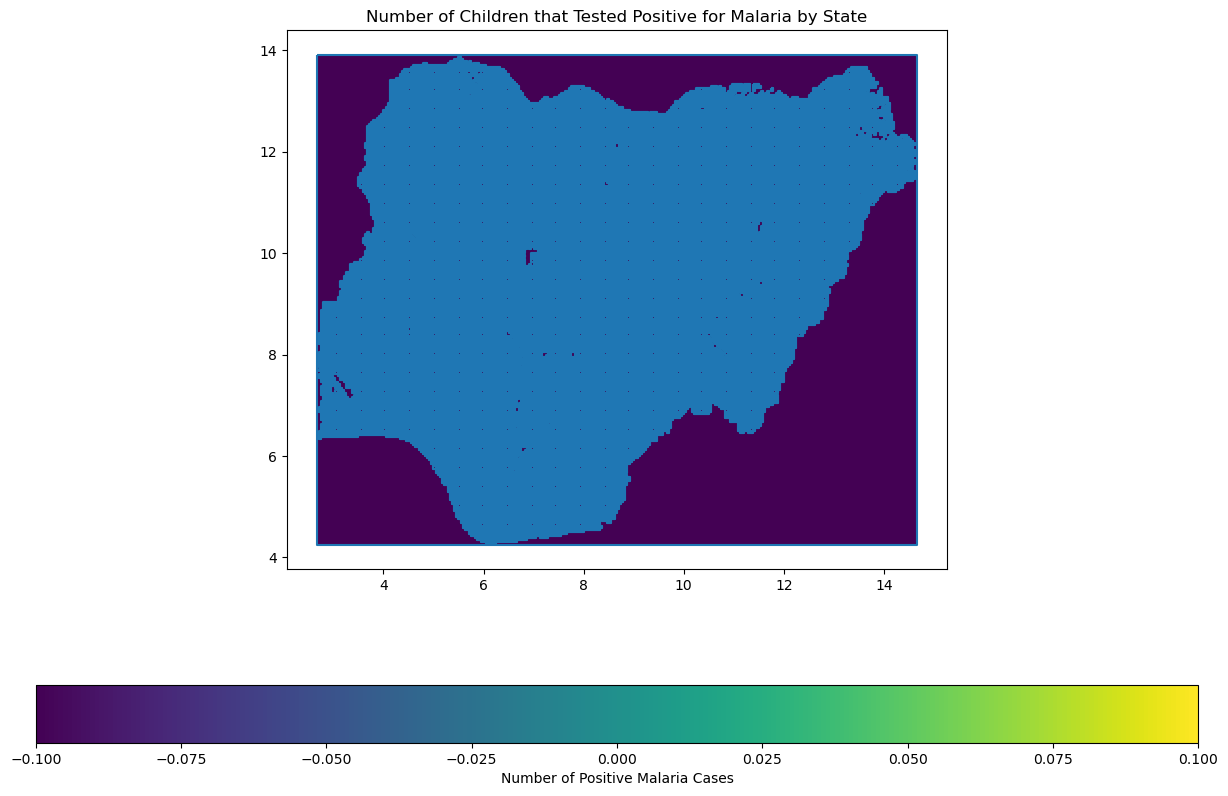

In [12]:
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.features import shapes
from shapely.geometry import shape

# Filter children who tested positive for malaria
positive_cases = df[df['hml32'] == 1]  # Assuming '1' indicates positive cases

# Count the number of positive cases by state
positive_counts_by_state = positive_cases.groupby('shstate').size().reset_index(name='count')

# Load the .tiff file with state boundaries using rasterio
tiff_file = './NGPR7ADT/housing data 2019 nigeria/2019_Nature_Africa_Housing_2015_NGA.tiff'
with rasterio.open(tiff_file) as src:
    image = src.read(1)  # Read the first band
    transform = src.transform

# Extract shapes from the raster file
shapes_generator = shapes(image, transform=transform)
geometries = [shape(geom) for geom, value in shapes_generator]

# Create a GeoDataFrame
states_gdf = gpd.GeoDataFrame({'geometry': geometries}, crs=src.crs)

# Merge the positive counts with the GeoDataFrame
merged_gdf = states_gdf.merge(positive_counts_by_state, how='left', left_index=True, right_on='shstate').fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
states_gdf.boundary.plot(ax=ax)
merged_gdf.plot(column='count', ax=ax, legend=True,
                legend_kwds={'label': "Number of Positive Malaria Cases",
                             'orientation': "horizontal"})


plt.title("Number of Children that Tested Positive for Malaria by State")
plt.show()


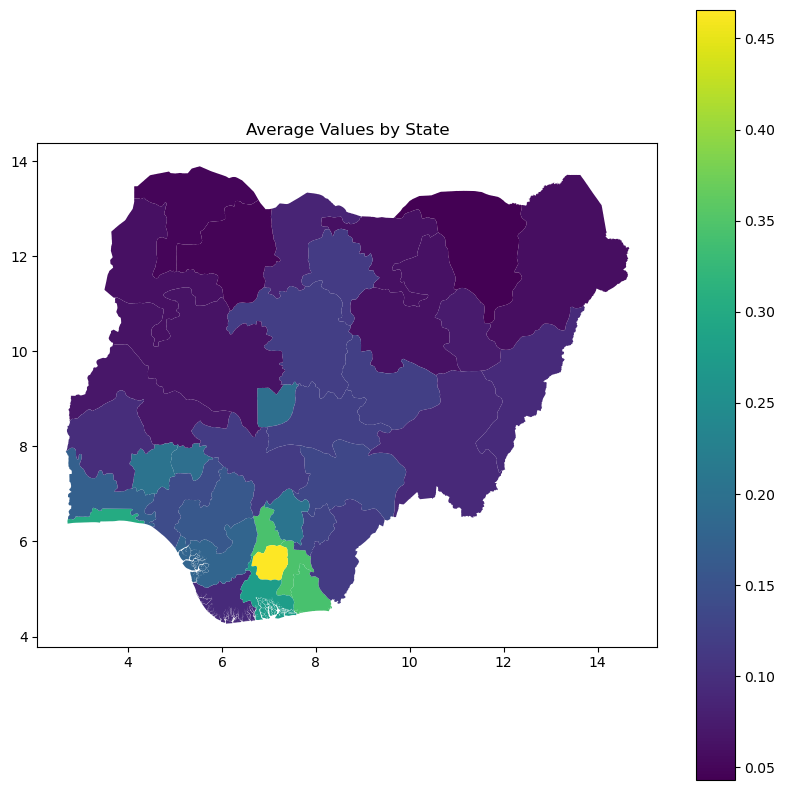

In [18]:
# tiff_file = './NGPR7ADT/housing data 2019 nigeria/2019_Nature_Africa_Housing_2015_NGA.tiff'
# states_gdf = gpd.read_file('./NGPR7ADT/shapefile/gadm36_NGA_1.shp')
import geopandas as gpd
import rasterio
import numpy as np
from rasterio.mask import mask
import matplotlib.pyplot as plt

# Load the raster file
tiff_file = './NGPR7ADT/housing data 2019 nigeria/2019_Nature_Africa_Housing_2015_NGA.tiff'
with rasterio.open(tiff_file) as src:
    raster_data = src.read(1)  # Reading the first band
    transform = src.transform

# Load state boundaries shapefile
states_gdf = gpd.read_file('./NGPR7ADT/shapefile/gadm36_NGA_1.shp')

# Compute average values by state
# Compute average values by state
state_averages = []

for index, state in states_gdf.iterrows():
    geometry = state['geometry']
    geo_json = [geometry.__geo_interface__]
    
    with rasterio.open(tiff_file) as src:
        out_image, out_transform = mask(src, geo_json, crop=True)
        out_image = out_image[0]  # Considering only the first band
        
    # Flatten the array and filter out masked values
    out_image = out_image.flatten()
    out_image = out_image[out_image != src.nodata]

    if len(out_image) > 0:
        state_mean = np.nanmean(out_image)
    else:
        state_mean = np.nan  # Handle cases with no valid data
    
    state_averages.append(state_mean)

states_gdf['average_value'] = state_averages

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
states_gdf.plot(column='average_value', ax=ax, legend=True, cmap='viridis')
plt.title('Average Values by State')
plt.show()



SCRAPING

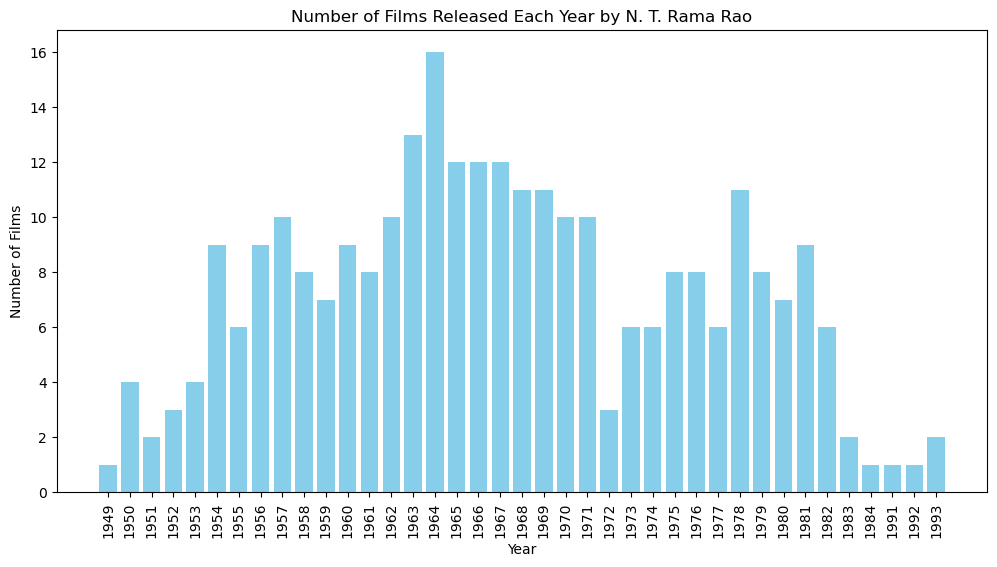

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/N._T._Rama_Rao_filmography"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the filmography data
    table = soup.find('table', {'class': 'wikitable'})

    # Ensure we found the table
    if table:
        # Extract the data
        years = []

        for row in table.find_all('tr')[1:]:  # Get all rows excluding the header
            cells = row.find_all('td')
            if len(cells) > 1:
                year = cells[0].text.strip()  # Extract the year from the first column
                years.append(year)

        # Count the number of films per year
        year_counts = Counter(years)

        # Data visualization
        years_sorted = sorted(year_counts.keys())
        counts_sorted = [year_counts[year] for year in years_sorted]

        plt.figure(figsize=(12, 6))
        plt.bar(years_sorted, counts_sorted, color='skyblue')
        plt.xlabel('Year')
        plt.ylabel('Number of Films')
        plt.title('Number of Films Released Each Year by N. T. Rama Rao')
        plt.xticks(rotation=90)
        plt.show()

    else:
        print("Failed to find the table. The table structure might have changed.")
else:
    print(f"Failed to retrieve data: {response.status_code}")

    